Today's installs require you to update py5canvas and install [gifsicle](https://www.lcdf.org/gifsicle/) for optimizing GIF outputs:
```
conda activate py5
pip install --upgrade py5canvas
mamba install gifsicle -y
```

# Animations, loops and adding UI controls to your sketches

In [1]:
from py5canvas import *

We have seen how to create simple animations in Py5canvas using the `draw()` function and `frame_count` to keep track of time.  E.g.
```python
def setup():
    create_canvas(400, 400)  

def draw():
    background(0)
    translate(center)
    rotate(radians(frame_count))
    circle(180, 0, 30)

run()
```

Now we will explore how to create perfect loops in our animations. 



What is a perfect loop? A perfect loop is an animation that seamlessly repeats itself after a certain duration, creating the illusion of continuous motion without any noticeable jumps or interruptions. 
This is particularly useful for creating GIFs or short video clips that need to loop indefinitely.  


We will learn how to do this also in sight of an online "event" that occurs each January. It is called **GENUARY**. Each day of January the website https://genuary.art/ suggests a prompt for artists to create art based on that prompt. Often the results that are posted (especially on Twitter/X) are code-generated loops. You can check these by searching for the [#GENUARY hashtag](https://x.com/search?q=%23GENUARY&src=typed_query)

>**LAB**. Check the [prompts from last year's GENUARY](https://genuary.art/prompts) and try to use one as a guiding goal for today's experiment(s). Create a short looping animation that could be shared. 


To create a perfect loop, **we need to ensure that the starting and ending frames of our animation are identical**.  

One way to create a circle is to think of the animation as a circle. The end connects back to the beginning, where the position at 0 degrees (`0` radians) is the same as the position at 360 degrees (`2_PI` radians).

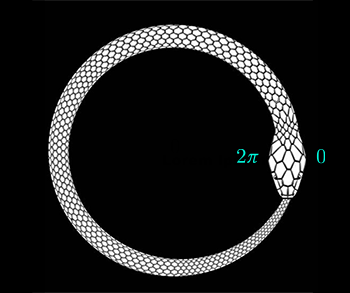


In the example above, we created a looping animation by using the `frame_count` to rotate an object continuously. 

However, to make it a perfect loop when saving the sketch as a video, we need to ensure that the rotation completes a full circle over a specific number of frames. How many frames would the example above need to complete a full rotation?

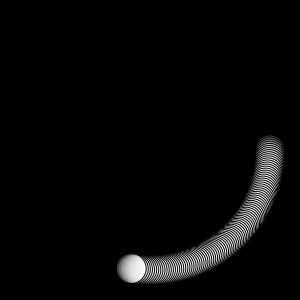

In [449]:
create_canvas(300, 300)
background(0)
fill(255, 60)
translate(center)
for frame_count in range(100):
    push_matrix()
    rotate(radians(frame_count))
    circle(120, 0, 30)
    pop_matrix()
show()

To set the number of frames that we save for the video, we can use the UI controls in Py5canvas:

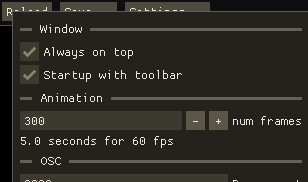

Or use the command `num_movie_frames(n)` in the `setup()` function, where `n` is the number of frames we want to save.

To save a video you can select "Mp4" from the "Save..." dropdown menu in the Py5canvas UI:

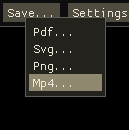

Try this with the [basic_loop.py](./basic_loop.py) example.

>**LAB:** Modify the `basic_loop.py` example to create a perfect loop that animates multiple rotating shapes. Note that for the loop to work you will need to ensure that every animated shape completes an integer number of cycles within the total number of frames set for the video (one cycle is a rotation of `TWO_PI` radians). 

## Looping with periodic functions

Another way to create perfect loops is to use periodic functions like sine and cosine. These functions naturally repeat their values over a specific interval, making them ideal for creating smooth, continuous animations that loop seamlessly. One thing to keep in mind with periodic functions is the **period** of the function. The period is the length of the interval over which the function completes one full cycle. For sine and cosine, the period is `2_PI` ($2\pi$) radians, so e.g. $\sin(x+2\pi) = \sin(x)$. 


With sine we transform a linear input (like `frame_count*0.01`) into a repeating output that oscillates between -1 and 1.   You can think of it also as measuring the y coordinate of a point moving along a circle, which leads to the periodic behavior. 

```python
from py5canvas import *

def setup():
    create_canvas(400, 400)  

def draw():
    background(0)
    translate(center)
    theta = radians(frame_count)
    circle(sin(theta)*150, 0, 30)

run()
```

The same holds for cosine, which measures the x coordinate of a point moving along a circle. Note that we can plug sine and cosine into any value, e.g. in the example above we shifted the horizontal (and not vertical) position of the circle by multiplying the sine value by 150.

As we have seen, sine and cosine can be combined to create more complex functions. We can use for example additive synthesis (adding sine waves) and/or amplitude modulation (multiplying sine waves) to create periodic waveforms, **as long as we make sure that the inputs to `sin` and `cos` are integer multiples of the input to our function**. We will use the Matplotlib visualization library and NumPy to visualize this across the notebook:

In [204]:
import matplotlib.pyplot as plt

def plot_periodic(func, T=TWO_PI):
    plt.style.use('ggplot')
    plt.figure(figsize=(6,3))
    t = np.linspace(0, 2 * T, 400)
    plt.plot(t, func(t))
    plt.axvline(T, color='k')
    plt.xlabel('time')
    plt.show()

Now let's visualize it

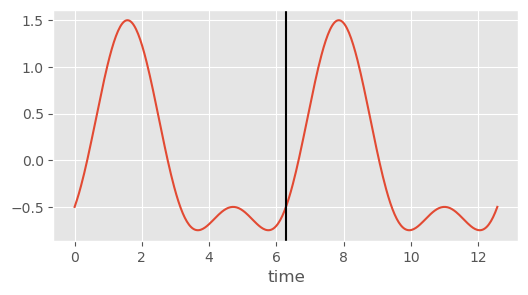

In [206]:
import matplotlib.pyplot as plt

def periodic_func(x):
    # Additive synthesis
    return sin(x) - cos(x*2)*0.5

# def periodic_func(x):
#     # Amplitude modulation
#     return sin(x)*cos(x*2)*0.5

plot_periodic(periodic_func)

Generally, it is useful to think of plots as the one above when creating animations. The horizontal axis is time and the vertical axis is a parameter that produces a visual result such as a displacement, the size of a shape, a rotation, the hue of a color, etc..  

If you install the SciPy library (with the `py5` environment active, do `mamba install scipy`), you can create other periodic signals with the [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html#waveforms) module:

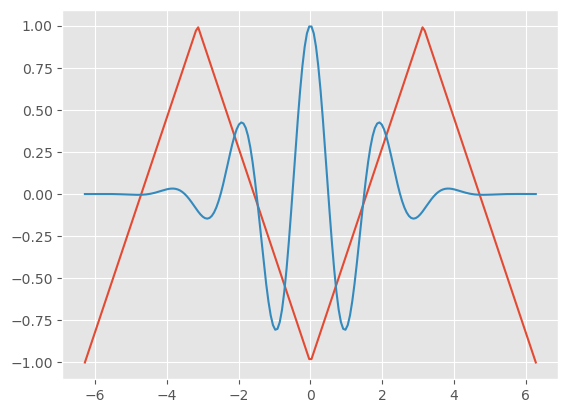

In [267]:
from scipy import signal
t = np.linspace(-TWO_PI, TWO_PI, 200)
plt.plot(t, signal.sawtooth(t, 0.5)) # Triangle wave
#plt.plot(t, signal.sawtooth(t, 0.0)) # Sawtooth wave
plt.plot(t, signal.gausspulse(t, 0.5)) # Gaussian modulated sinusoid
plt.show()


Try to think of how the different signals could be used for animation

# Combining inputs 

To create looping animations we need to add time to the input of a periodic function, but we can create interesting effects by combining time with other variables. E.g. we can create animated patterns by considering the position of a shape on the canvas or its distance to a position, say the center of the canvas:

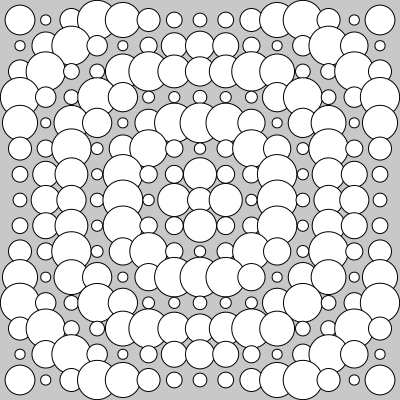

In [62]:
create_canvas(400, 400)
rows, cols = 15, 15
spacing = 20
t = 0.0
for i in range(rows): 
    for j in range(cols):
        x = remap(j, 0, cols-1, spacing, width-spacing)
        y = remap(i, 0, rows-1, spacing, width-spacing)
        d = dist((x, y), center)
        w = remap(sin(d*0.1 + t*TWO_PI), -1, 1, spacing*0.5, spacing*2)
        circle(x, y, w)
show()        

In an interactive sketch we can replace `t` with `frame_count/num_frames` to get a looping animation. **Note that we multiply `t` by `TWO_PI` to get a full period of `sin`.** 

>**LAB**. Experiment with the [loop_grid.py](./loop_grid.py) example. Change shapes, colors, parameters, increase abstraction. Try using additive synthesis or amplitude modulation to create more complex patterns and animations. Make sure you use integer multiples of `t` to guarantee a looping animation! 

## Modulo and loops

We have seen that rotations, sine and cosine are our friend when we want to create looping animations. Another tool that is useful to for the same task is the [modulo (AKA remainder) operator](https://www.datacamp.com/tutorial/modulo-operator-python). 



The modulo operator is written as `%` in Python (e.g. `3%2`). When both numbers are integers, it gives the remainder of the corresponding division. However, in Python the `%` operator also works with *both integers and floating point numbers*. **It gives an offset from zero for the value on the left, given a looping cylcle with length the number on the right**. In other words, **it wraps a value in specified range**.

One way of thinking of it, is taking the desired range (the number on the right) and wrapping it around a circle, which is similar to the way in which clocks display time, but we always put zero at the beginning of the cycle:
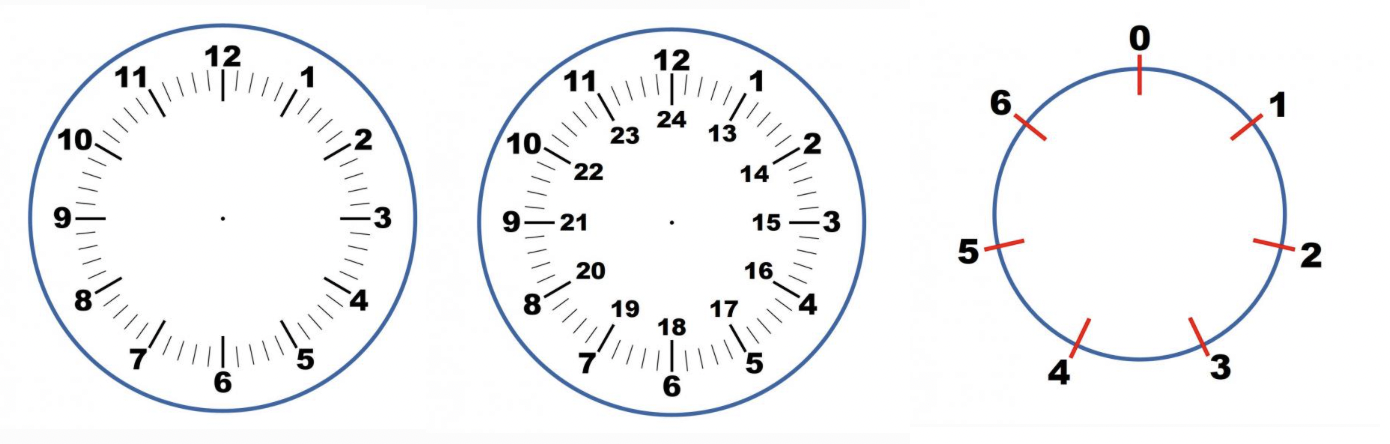

We can visualize this on a circle, without using modulo but just wrapping the numbers in circles

modulo 7


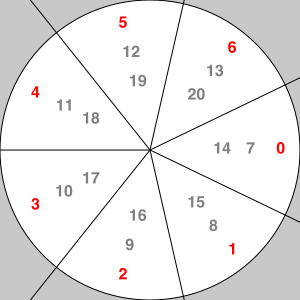

In [312]:
create_canvas(300, 300)
translate(center)
text_align(CENTER, CENTER); text_style('bold')
n = 7 # Number on right of modulo
inc = 1
print('modulo ' + str(round(n*inc, 1)))
circle(0,0,width)
for i in range(n):
    line([0, 0], direction(TWO_PI*(i+0.5)/n)*width)

no_stroke()
v = 0
r = width*0.43
fill(255, 0, 0)
for i in range(3):
    for j in range(n):
        text(str(round(v,1)), direction(TWO_PI*j/n)*r)
        v += inc
    r -= 30
    fill(128)
show()


## "Wrapping" graphics with modulo

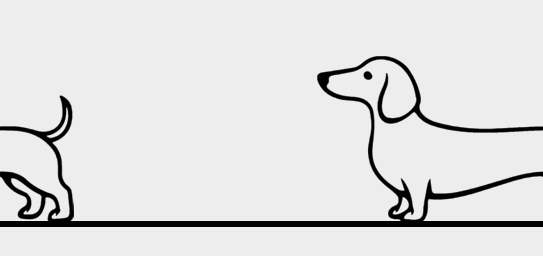


One simple way to use modulo is to have an animated object appear on the one end of the canvas when it disappears on the other end, e.g.:

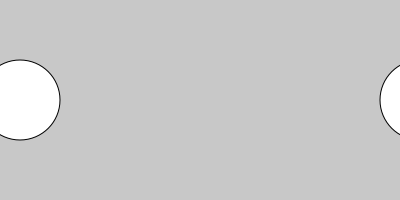

In [190]:
create_canvas(400, 200)
r = 40
x = 420
circle((x - r) % width + r,  height/2, r*2)
circle((x + r) % width - r,  height/2, r*2)
show()


In this example we draw two circles to display the wrapped part appearing on the other end of the canvas, as if we unwrapped the canvas from the surface of a 3D cylinder. 

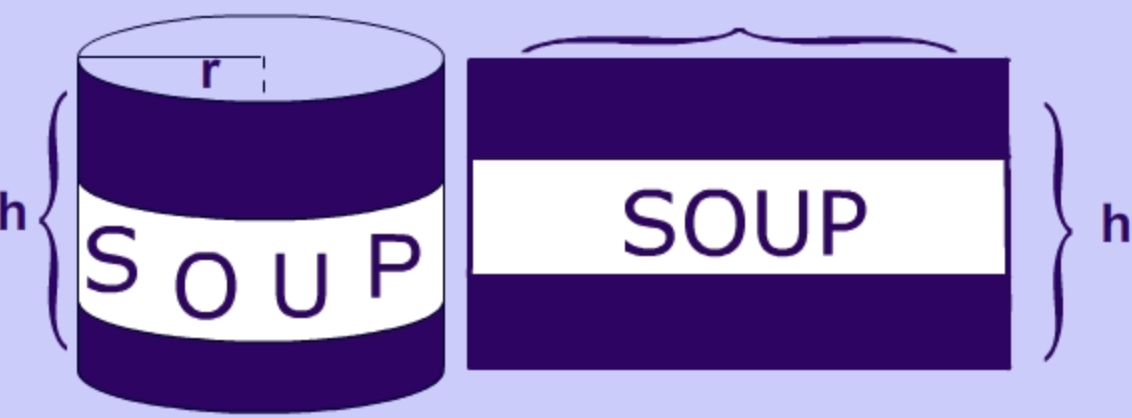


A simpler but useful alternative, perhaps more practical for most animation purposes, is to use a range bigger than the canvas area, so that objects disappear completely, and then gradually reappear on the opposite side. This will not require drawing the same object multiple times as we did above.




>**LAB**:  The [wrap_loop.py](./wrap_loop.py) does exactly that:
> - Experiment with replacing the circles in the `draw_object` function. 
> - Try to create an animation inside `draw_object` using randomness. 
>    - To have predictable sequences of random numbers, call `random_seed` with a value of your choice at the beginning of `draw()`. 


### "Infinite" motion with modulo

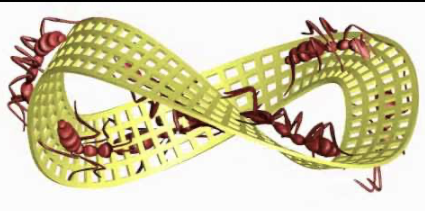

Generally, modulo is very useful if you want to create movement that appears to be "infinite". This works well with repeated and evenly spaced shapes. Here we can use modulo to loop the motion from one shape to the next, while creating the illusion of a continuous motion. 

>**LAB**: Experiment with [modulo_circles.py](./modulo_circles.py): try adding ripples, experiment with different shapes and colors

# Manipulating and animating pixels with NumPy

Last week we saw how to read the pixels of an image or video using the PIL library. While PIL is a great high level interface for operating with images, we soon hit a bottleneck if we try to operate on pixels directly using Python loops. As an example, let's create a pattern on a grid by setting each pixel of a canvas using `point`, and let's time this using the built-in `time` Python module:

160000 pixels
Elapsed seconds: 1.6356680393218994


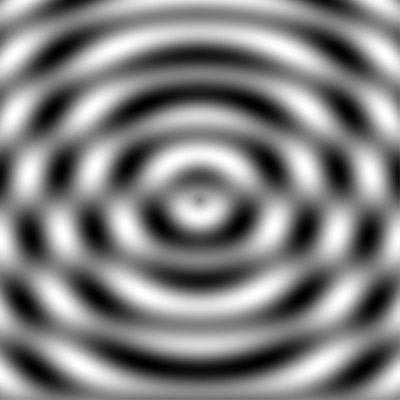

In [338]:
import time
create_canvas(400, 400)
stroke_weight(2)
start_time = time.time()
for y in range(height):
    for x in range(width):
        d = dist(x, y, width/2, height/2)
        v = sin(d*0.1)*sin(d*0.005 - y*0.05)*0.5 + 0.5
        stroke(v*255)
        point(x, y)
print(width*height, 'pixels')
print('Elapsed seconds:', time.time() - start_time)
show()


While we could probably optimize this a bit by directly writing pixels into an image an not using `point`, but generally, you can see that setting every pixel of a 400x400 canvas (160000 pixels) using mathematical operations takes more than one second, making it a no-go for creating animations. Using another language, like Javascript this would likely take a fraction of a second, and lower-level languages as C, C++ or Rust would likely be an order of magnitude faster.

At the same time, we can do things fast in Python but we have to use the concept of "vectorization", not in the computer graphics sense but in the sense of using batch operations on numbers (as we do with vectors) instead of treating each number separately. One common way to do this is using the NumPy library, which we have briefly seen last week:

160000 pixels
Elapsed seconds: 0.014491081237792969


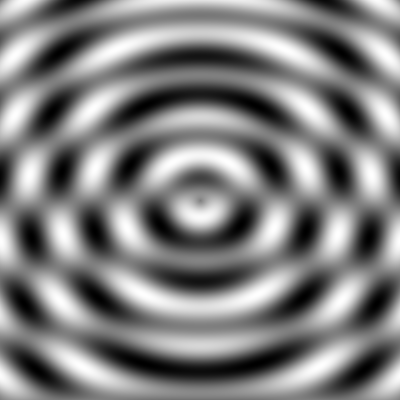

In [336]:
import numpy as np
import time

create_canvas(400, 400)
# Build coordinate grids
y, x = np.mgrid[0:height, 0:width]
start_time = time.time()
# Distance from center (vectorized)
cx, cy = width / 2, height / 2
d = sqrt((x - cx)**2 + (y - cy)**2)
# Operation on each pixel vectorized
v = sin(d*0.1)*sin(d*0.005 - y*0.05)*0.5 + 0.5
image(v)
elapsed = time.time() - start_time
print(width * height, "pixels")
print("Elapsed seconds:", elapsed)
show()

A master of using these techniques is [Simone Conradi](https://profconradi.com), a physicist and artists that uses NumPy to create stunning images and animations. He often posts his results on [twitter/X](https://x.com/S_Conradi).

### NumPy arrays
Most of the mathematical operations in Py5canvas are actually "wrappers" around NumPy functions, meaning that they can operate on arrays of numbers as well as single values. That holds for `sin`, `cos`, `noise`, `sqrt`, `remap` and many others. These functions are applied to each element of an array and return an array of the same size as the input.

We have seen last week how we can create an array of equally spaced values in a range using `np.linspace`, and we have seen in the earlier examples how we can use this to compute for example the values of a sine wave. We use the Matplotlib library here again because it is designed to rapidly graph NumPy arrays:

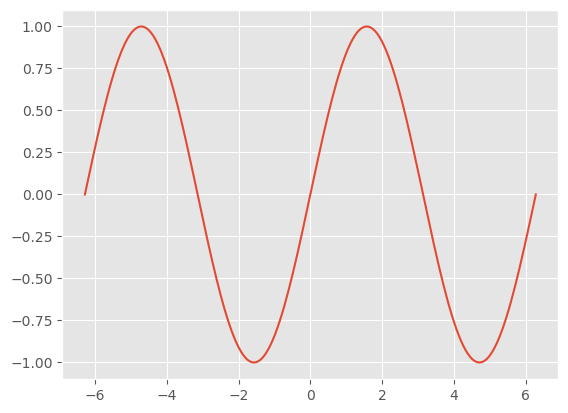

In [340]:
t = np.linspace(-TWO_PI, TWO_PI, 200)
plt.plot(t, sin(t))
plt.show()

A convenient way to represent a **grayscale** image in NumPy is using a 2D array, that is a matrix of numbers. When using NumPy it is convenient to treat pixel intensities as floating point numbers between `0` to `1`, as opposed to integers from `0` to `255`. Doing so gives higher precision while making mathematical operations more stable. E.g. multiplying two (white) pixels having value `255` would give `65025`, while the same operation representing white with `1.0`, will still give `1.0`.

### Loading images and converting to NumPy
One way to get a starting image for our operations is loading an image, converting it to grayscale, cropping it to the desired size and then converting it to an array, we can do: 

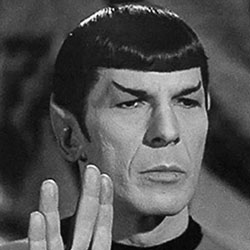

In [384]:
img = load_image('spock.jpg').convert('L').crop((0, 0, 250, 250))
create_canvas(img.width, img.height)
v = np.array(img)/255 # Convert to array in 0 to 1 range
image(v)
show()

When doing operations on an image, it can be inconvenient to keep track of the range of the resulting operations so we can take advantage of the possibility to do batch operations on arrays to "normalize" the image, i.e. convert it to the range between 0 and 1. Here is a helper function to do so:


In [385]:
def normalize_image(im):
    return (im - im.min())/(im.max() - im.min())

Now we can easily do arbitrary operations on the image values, e.g.

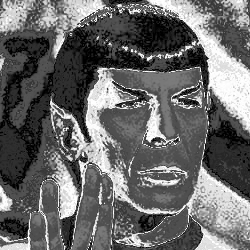

In [392]:
create_canvas(img.width, img.height)
v = np.array(img)/255 # Convert to array in 0 to 1 range
v = noise(np.sin(v*2)*2)
image(normalize_image(v))
show()

### Creating gradients as a starting point
In the example above we created two initial 2D arrays, one for the x coordinates and one for the y. This can be done with the quite obscure `np.mgrid[0:rows, 0:cols]` syntax. It returns two arrays having `rows` rows and `cols` cols. E.g:

In [415]:
rows, cols = 5, 7
y, x = np.mgrid[0:rows, 0:cols]

print('x'); print(x)
print('y'); print(y)

x
[[0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]]
y
[[0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4]]


Note that the return values and the syntax for `mgrid` has rows first (y's) followed by columns (x's), which can be confusing since we have always used `x` followed by `y`. 

In the earlier example we computed the distance from the center for each of these values by using Pythagoras' theorem and computing the (Euclidean) distance with $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$. E.g. for the arrays above we have:

In [416]:
cx, cy = cols / 2 - 0.5, rows / 2 - 0.5 # width, height
round(sqrt((x - cx)**2 + (y - cy)**2), 2)

array([[3.61, 2.83, 2.24, 2.  , 2.24, 2.83, 3.61],
       [3.16, 2.24, 1.41, 1.  , 1.41, 2.24, 3.16],
       [3.  , 2.  , 1.  , 0.  , 1.  , 2.  , 3.  ],
       [3.16, 2.24, 1.41, 1.  , 1.41, 2.24, 3.16],
       [3.61, 2.83, 2.24, 2.  , 2.24, 2.83, 3.61]])

To make things precise when printing, we add `0.5` to the center coordinates, otherwise we are not considering the center of a pixel but a corner. But this does not really make a big difference if working with denser images.

### Other ways to generate grids of values
While the above is the most concise, there are other ways to create grids of values in NumPy. One is using the similar `np.meshgrid` function, which takes two 1D arrays as inputs. To make things more confusing, by default `np.meshgrid` expects `x` (columns) first, followed by `y` (rows) and returns grids in the same order. 

In [433]:
x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))
print('x'); print(round(x, 1))
print('y'); print(round(y, 1))


x
[[-1.  -0.7 -0.3  0.   0.3  0.7  1. ]
 [-1.  -0.7 -0.3  0.   0.3  0.7  1. ]
 [-1.  -0.7 -0.3  0.   0.3  0.7  1. ]
 [-1.  -0.7 -0.3  0.   0.3  0.7  1. ]
 [-1.  -0.7 -0.3  0.   0.3  0.7  1. ]]
y
[[-1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1.   1.   1. ]]


Using `meshgrid` we have more control on the range of values in the grid, e.g. in the example above zero is in the center of the image, allowing us to more concisely compute the (squared) distance to the center without needing a subtraction

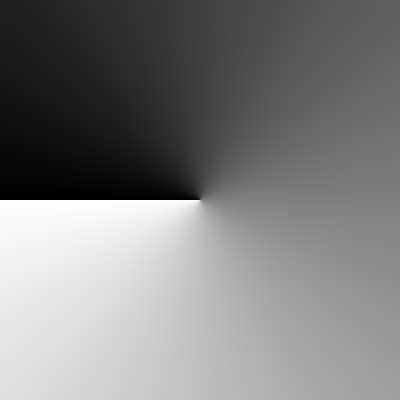

In [437]:
create_canvas(400, 400)
x, y = np.meshgrid(np.linspace(-1, 1, width), np.linspace(-1, 1, height))
r = sqrt(x*x + y*y) # Wrap with `sqrt` to get actual distance
angle = atan2(y, x)
image(normalize_image(angle))
show()

In the example above we essentially converted the cartesian coordinates on the grid (with (0,0) at the center) to polar coordinates by applying operations element-wise to NumPy arrays. The `atan2` (or equivalently `np.arctan2`) takes two arrays as an input the `y` (vertical displacement) first and the `x` (horizontal displacement) second. Conceptually, it behaves like computing the arc-tangent (inverse tangent) `arctan(y/x)` but it robustly handles all "quadrants" (the 4 areas bounded by the coordinate axes) an avoids undefined division issues when an element of `x` is zero.

This kind of starting image makes it much easier to apply mathematical operations to generate patterns, e.g

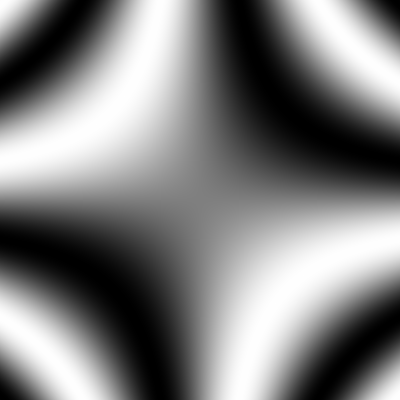

In [432]:
create_canvas(400, 400)
x, y = np.meshgrid(np.linspace(-1, 1, width), np.linspace(-1, 1, height))
v = sin(x*4 * y*2)
image(normalize_image(v))
show()

And this gives us a good starting point for generating looping animations with the techniques we have learned so far.

>**LAB**. You can experiment with animations using NumPy arrays in the [numpy_loop.py](./numpy_loop.py) example. As in the other examples, the key to creating a looping animation is having a time variable going from 0 to 1 for all the animation frames, and multiplying it by integer multiplies of `TWO_PI` inside `sin` or `cos`. Experiment with the formulas in the example

### Adding color

Directly manipulating colored images can be trickier than using a single channel as we did so far. However, we can use the "palette trick" we did last time also with NumPy arrays, colorizing each value of an image based on its intensity. Let's load a palette:

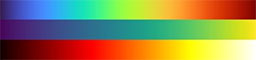

In [443]:
palette = load_image('palette.jpg')
palette

We treat the horizontal axis of our palette image as a 1-D color ramp. For any row we select from the palette, a grayscale value of 0 maps to the leftmost color and a grayscale value of 1 maps to the rightmost color. To apply this we:
- Convert the input image into a NumPy array with values in `[0, 1]`.
- Convert each grayscale value to an integer column index between `0` and the palette width minus 1.
- Use that index to look up the corresponding color from the palette row and build an RGB image.

In [446]:
def colorize_image(grey_img, palette, row):
    palette = np.array(palette)/255 # Assume input is a PIL image
    grey_img = normalize_image(grey_img)
    rows, cols, channels = palette.shape
    row = int(row*(rows-1))
    # .astype converts an array to the given type
    # we need indices to be integers so we convert to `int`
    indices = (grey_img * (cols - 1)).astype(int)
    return palette[row, indices]

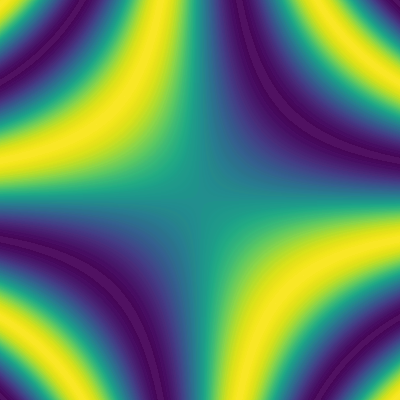

In [448]:
create_canvas(400, 400)
x, y = np.meshgrid(np.linspace(-1, 1, width), np.linspace(-1, 1, height))
v = sin(x*4 * y*2)
image(colorize_image(v, palette, 0.5))
show()

>**LAB**: Integrate the palette into the animated example

## Dictionaries, and adding UI's to your sketches

Python dictionaries are a datatype that has a syntax very similar to JavaScript "objects" and to the JSON (JavaScript Object Notation) file format. They allow to store "key"/"value" pairs, where the key is usually (but not necessarily) a string. E.g. 

In [450]:
person = {"name": "Jason",
          "surname": "Json",
          "age":99}
person

{'name': 'Jason', 'surname': 'Json', 'age': 99}

You can access entries of a dictionary using square brackets with the key inside the brackets, e.g.

In [451]:
person['name']

'Jason'

### Creating UI's with dictionaries

We can use this datatype to automatically create a user interface with named parameters for our sketches. To display sliders and other UI elements, Py5canvas uses a Python "wrapper" of [Dear IMGUI](https://github.com/ocornut/imgui), a graphical user interface that is widely used for prototypes, especially in the games industry. 

To create an UI with parameters you need to define a `parameters()` function (like you do with `draw` and `setup`) and return a dictionary that describes the parameters for your sketch. As an example:

```python
def parameters():
    return {'Width': (100.0, 10.0, 200.0),
            'Height': (100.0, 10.0, 200.0),
            'My Color': ([255, 0, 0], {'type':'color'})}
```

Will display this UI on the right of your canvas:

![image-2.png](attachment:image-2.png)

While you define the parameters as a dictionary (`dict`), these will be accessible with dot notation through a `params` object exposed to the sketch. As an example, the dictionary above will expose `params.width`, `params.height` and `params.my_color`. 

Note that the parameter names we defined contain spaces and capitals. **These will be automatically converted to names that are all lower-case and with spaces replaced by underscores.** The originally specified names will appear as labels when the UI is created.